In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.drop(labels=['deck', 'embark_town', 'alive', 'class', 'adult_male'], inplace = True, axis = 1)

In [5]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
alone         0
dtype: int64

In [6]:
def imupute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass'] == 2]['age'].mean()
        elif pclass == 3:
            return titanic[titanic['pclass'] == 3]['age'].mean()
    else:
        return age

In [7]:
titanic['age'] = titanic[['age', 'pclass']].apply(imupute_age, axis = 1)

C:\Users\prant\AppData\Local\Temp\ipykernel_8028\2054774961.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = cols[0]
C:\Users\prant\AppData\Local\Temp\ipykernel_8028\2054774961.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass = cols[1]


In [8]:
new = 'S'
titanic['embarked'].fillna(new, inplace = True)

C:\Users\prant\AppData\Local\Temp\ipykernel_8028\1314020715.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(new, inplace = True)


In [9]:
# sex
genders = {'male': 0, 'female': 1}
titanic['sex'] = titanic['sex'].map(genders)

# embark
ports = {'S': 0, 'C': 1, 'Q': 2}
titanic['embarked'] = titanic['embarked'].map(ports)

# who
who = {'man': 0, 'woman': 1, 'child': 2}
titanic['who'] = titanic['who'].map(who)

# alone
alone = {True: 1, False: 0}
titanic['alone'] = titanic['alone'].map(alone)

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    int64  
 8   who       891 non-null    int64  
 9   alone     891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [11]:
titanic['fare'] = titanic['fare'].astype('int')
titanic['age'] = titanic['age'].astype('int')

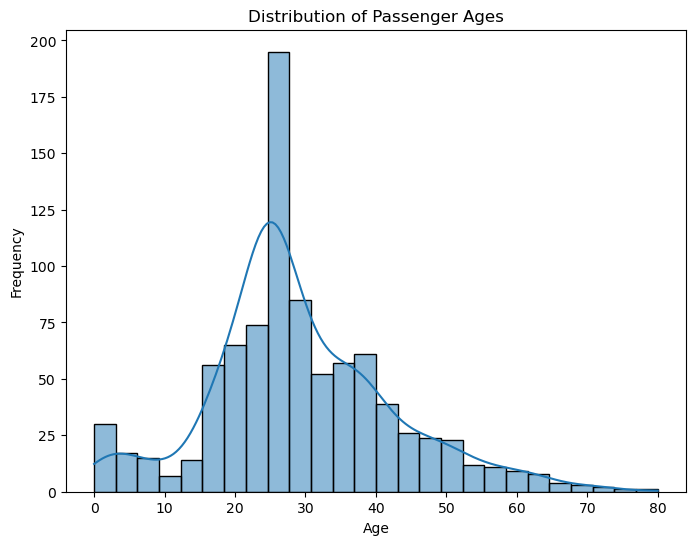

In [12]:
# Distribution of Passenger Ages
plt.figure(figsize=(8, 6))
sns.histplot(titanic['age'], kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


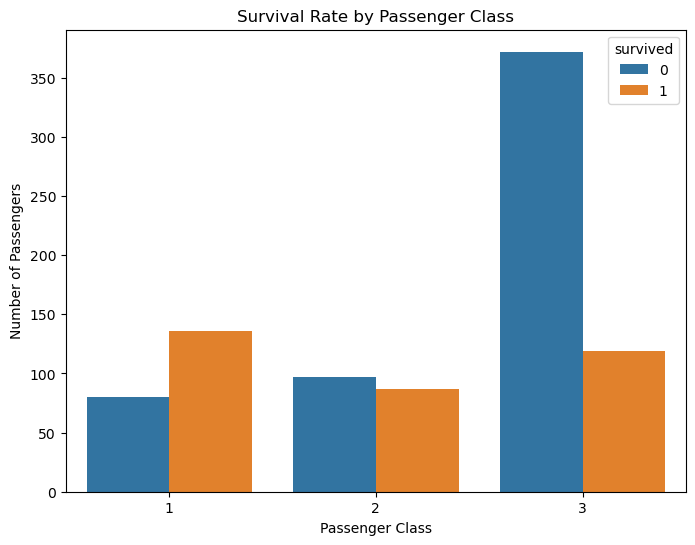

In [13]:
# Survival Rate by Passenger Class
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

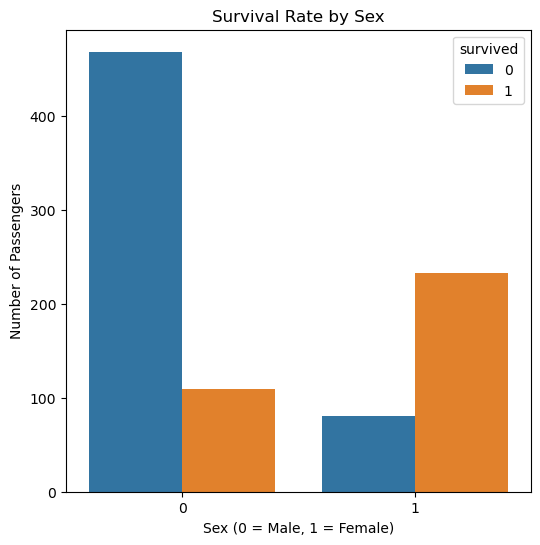

In [14]:
# Survival Rate by Sex
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Number of Passengers')
plt.show()


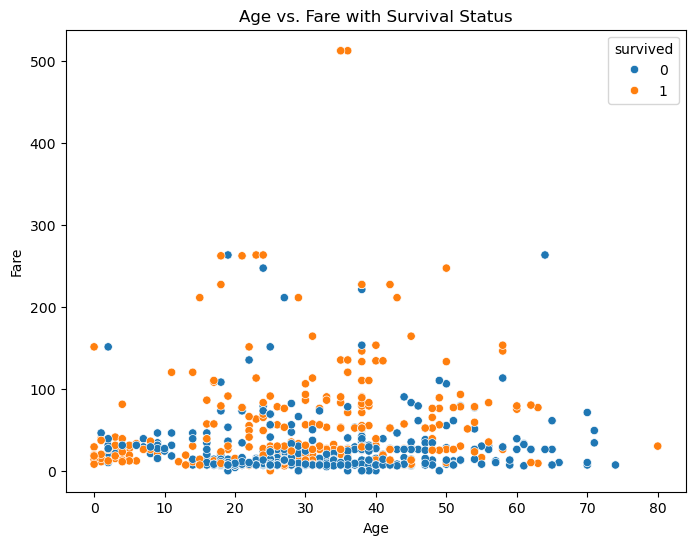

In [15]:
# Relationship between Age and Fare
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic)
plt.title('Age vs. Fare with Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


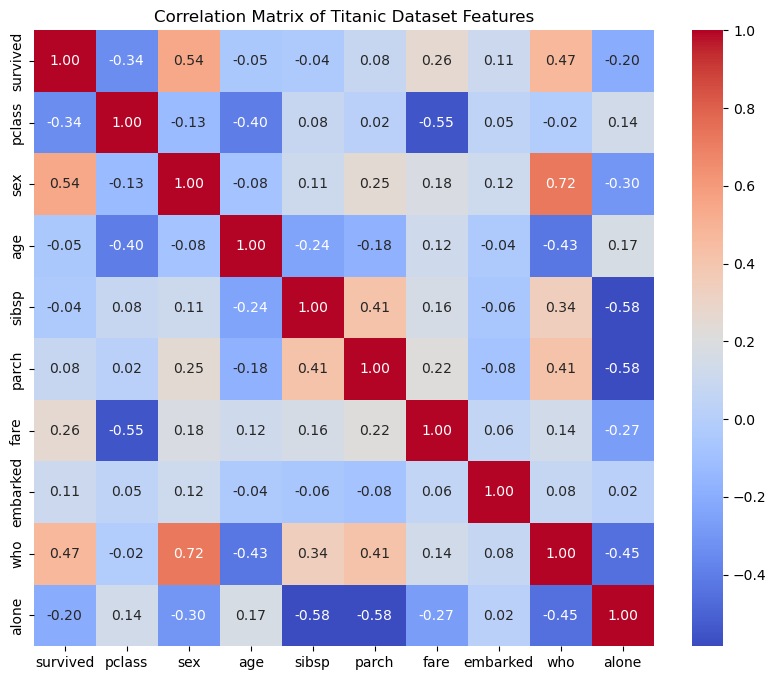

In [16]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Titanic Dataset Features')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [19]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
model = []
model.append(('LR', LogisticRegression(max_iter = 400)))
model.append(('NB', GaussianNB()))
model.append(('KNN', KNeighborsClassifier()))
model.append(('DT', DecisionTreeClassifier()))
model.append(('SVM', SVC()))
model.append(('RF', RandomForestClassifier()))

In [21]:
for name, mod in model:
  mod.fit(X_train, y_train)
  y_pred = mod.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy score of {} is {}".format(name, accuracy))

Accuracy score of LR is 0.8100558659217877
Accuracy score of NB is 0.7877094972067039
Accuracy score of KNN is 0.7262569832402235
Accuracy score of DT is 0.7821229050279329
Accuracy score of SVM is 0.6536312849162011
Accuracy score of RF is 0.8324022346368715
